Importing necessary libraries

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error
import warnings
from tqdm import tqdm
import time
warnings.filterwarnings('ignore',category=DeprecationWarning)

Importing and analyzing the data

In [91]:
df = pd.read_csv('D:/Coding Stuff/StudentPerformanceFactors.csv')
pd.set_option('display.max_columns',None)
pd.set_option('display.width',0)
pd.set_option('display.max_rows',None)
df.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


In [28]:
print(" Number of rows is",df.shape[0],"\n","Number of columns is",df.shape[1])
print("Data types are :\n",df.dtypes)

 Number of rows is 6607 
 Number of columns is 20
Data types are :
 Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object


In [29]:
df[df.isnull().any(axis=1)].head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
33,14,60,High,Medium,No,5,50,Medium,Yes,2,Medium,Medium,Public,Neutral,3,No,College,NaN,Female,61
127,17,97,Medium,Medium,No,8,89,Medium,Yes,1,Low,NaN,Public,Neutral,4,No,High School,Far,Male,69
240,15,87,Low,Medium,No,4,54,Medium,Yes,1,Medium,Medium,Public,Neutral,6,No,NaN,Moderate,Male,65
275,23,82,Low,Medium,Yes,8,94,Medium,Yes,1,Medium,Medium,Public,Negative,2,Yes,High School,NaN,Male,66
316,24,90,Low,Low,No,7,83,Medium,Yes,0,Low,Medium,Private,Positive,3,No,College,NaN,Male,68


We can see missing values are only there for 3 columns mentioned below

In [30]:
print("Number of rows with missing values is ",df.isnull().any(axis=1).sum())
df[df[['Parental_Education_Level', 'Distance_from_Home', 'Teacher_Quality']].isnull().any(axis=1)][['Parental_Education_Level', 'Distance_from_Home', 'Teacher_Quality']].head()

Number of rows with missing values is  229


,Parental_Education_Level,Distance_from_Home,Teacher_Quality
33,College,NaN,Medium
127,High School,Far,NaN
240,NaN,Moderate,Medium
275,High School,NaN,Medium
316,College,NaN,Medium


As there are only 229 rows out of 6607 with missing values , its okay to drop those and it wont affect our model much

In [31]:
df = df.dropna()
print("Number of rows now =",df.shape[0])
df.head()

Number of rows now = 6378


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


Now lets see the data distribution

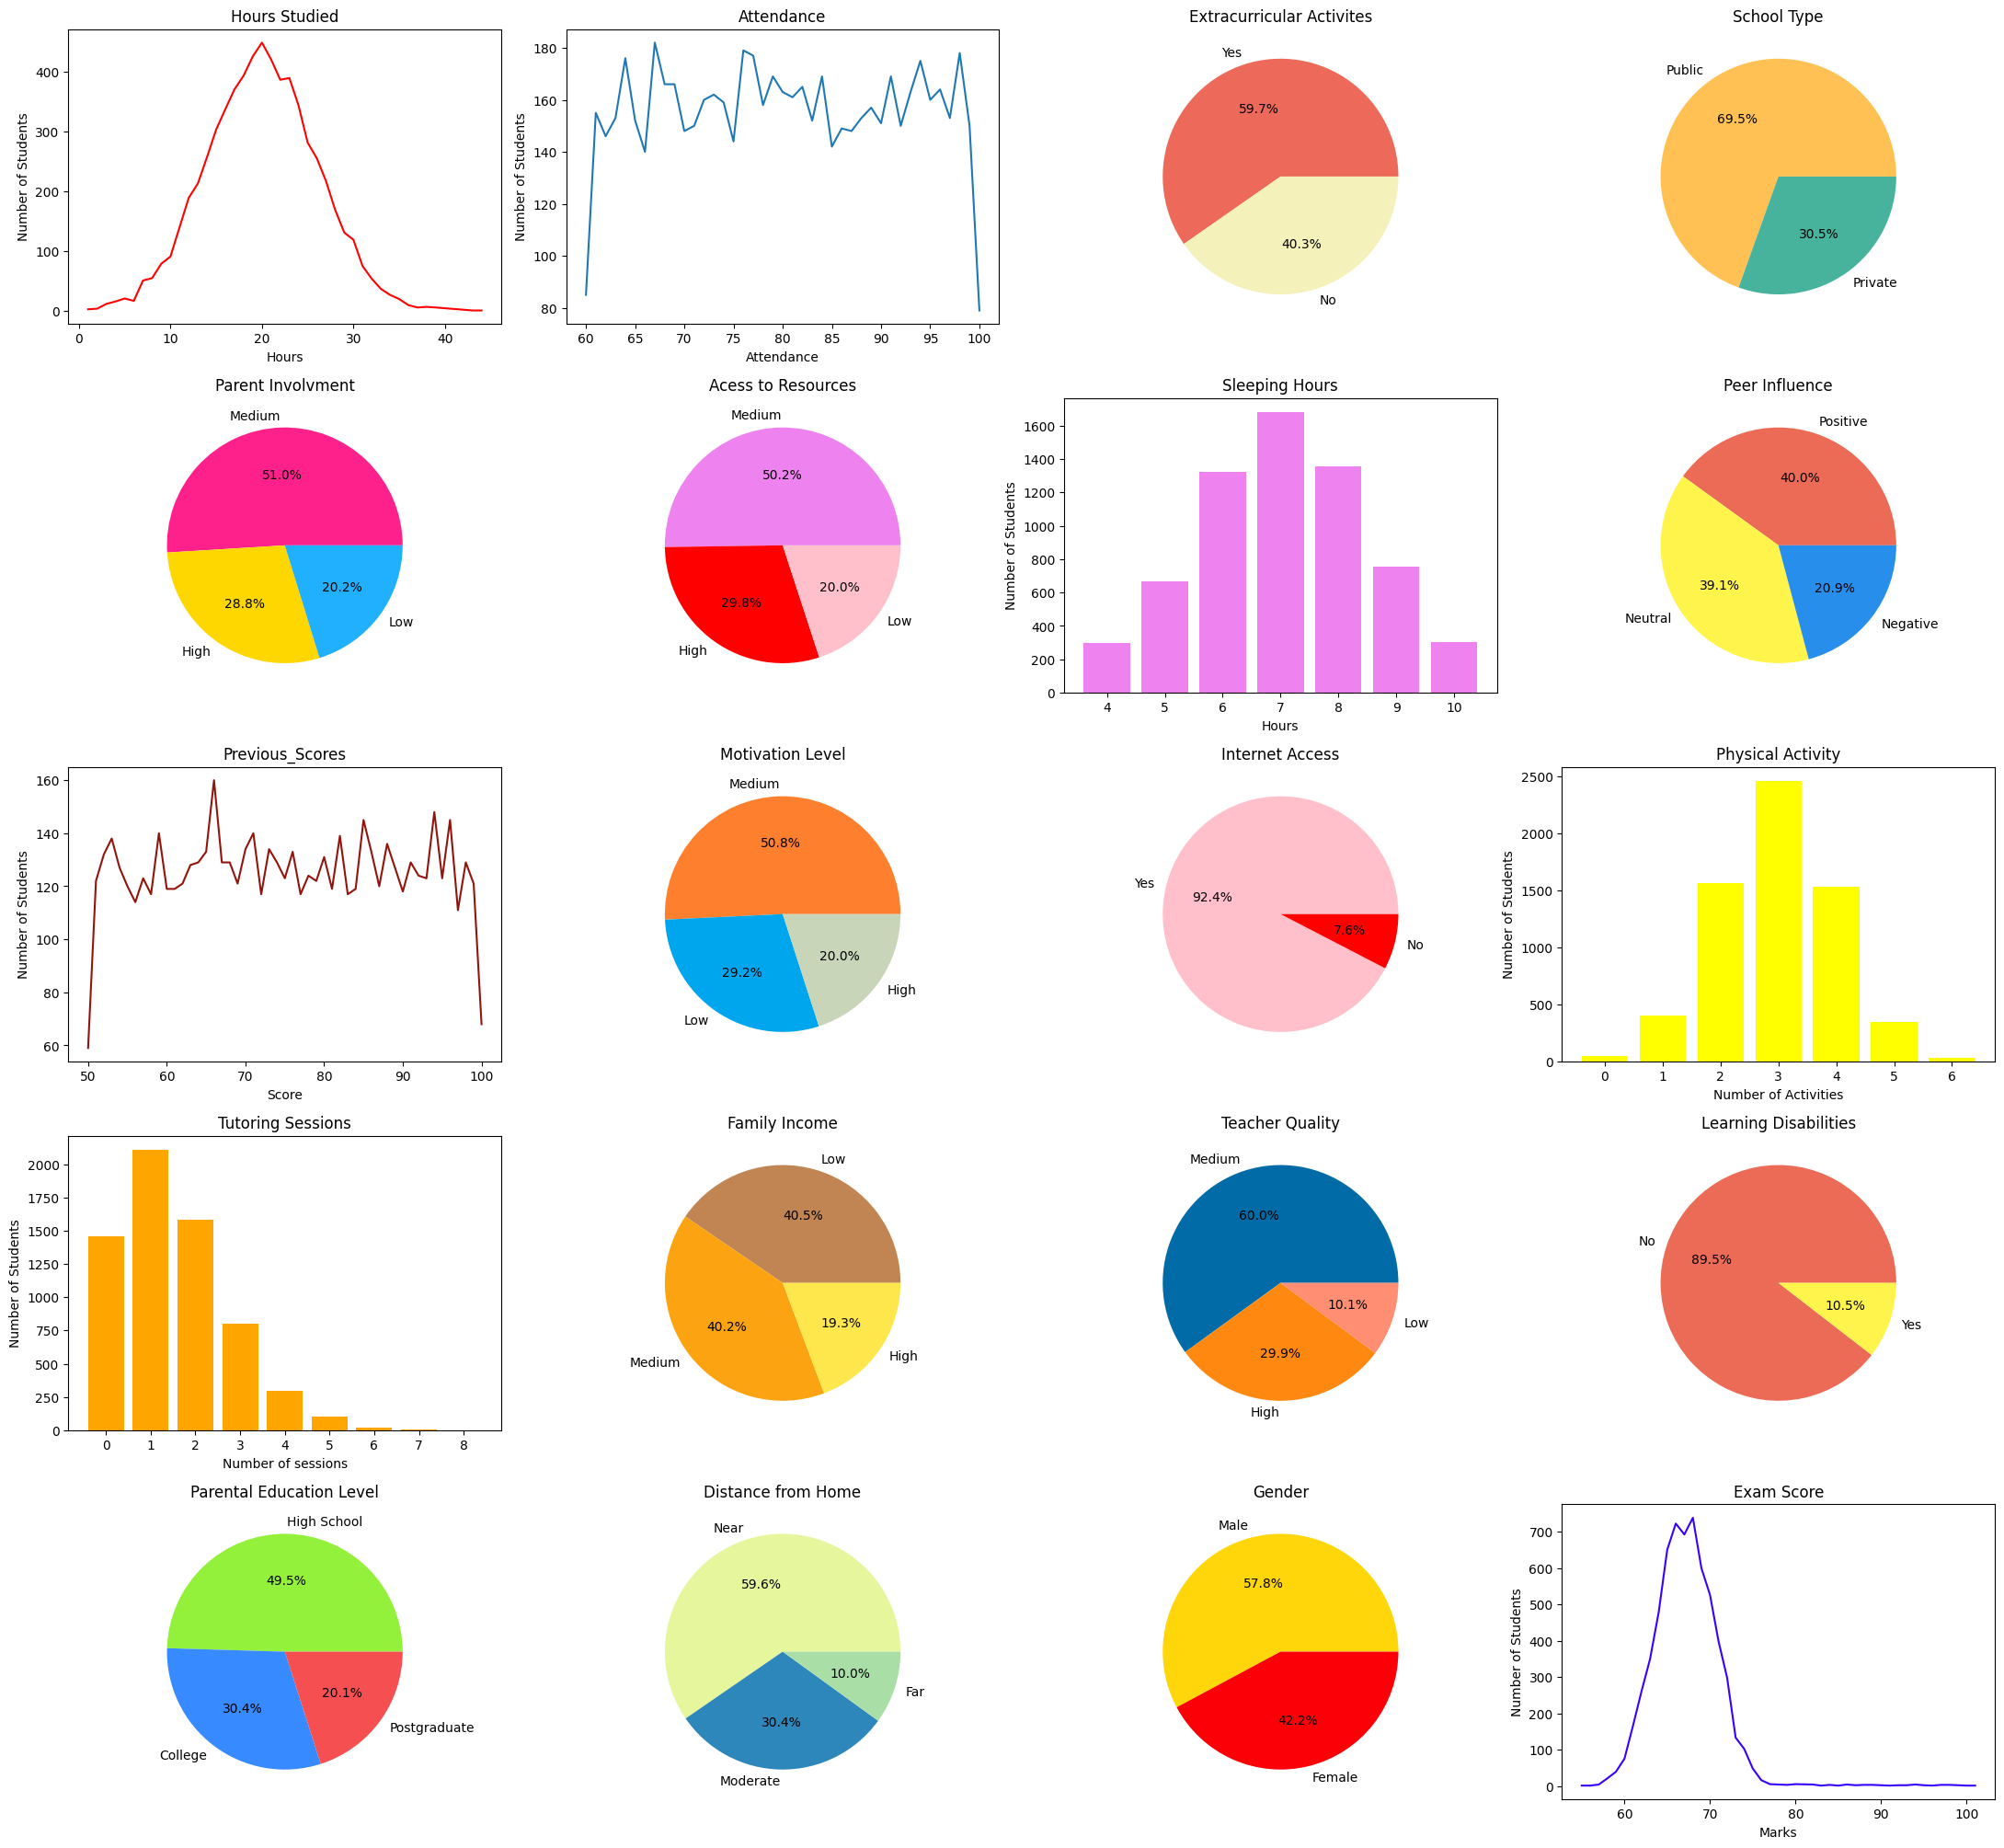

In [32]:
fig,axs = plt.subplots(5,4,figsize=(22,20))
axs[0,0].plot(df["Hours_Studied"].value_counts().sort_index().index,df["Hours_Studied"].value_counts().sort_index().values,color='red')
axs[0,0].set_title('Hours Studied')
axs[0,0].set_xlabel('Hours')
axs[0,0].set_ylabel('Number of Students')
axs[0,1].plot(df["Attendance"].value_counts().sort_index().index,df["Attendance"].value_counts().sort_index().values)
axs[0,1].set_title('Attendance')
axs[0,1].set_xlabel('Attendance')
axs[0,1].set_ylabel('Number of Students')
axs[1,0].pie(df["Parental_Involvement"].value_counts().values,labels=df["Parental_Involvement"].value_counts().index,autopct='%1.1f%%',textprops={'fontsize':10},colors = ['#FE218B', '#FED700', '#21B0FE'])
axs[1,0].set_title('Parent Involvment')
axs[1,1].pie(df["Access_to_Resources"].value_counts().values,labels=df["Access_to_Resources"].value_counts().index,autopct='%1.1f%%',textprops={'fontsize':10},colors = ['violet', 'red', 'pink'])
axs[1,1].set_title('Acess to Resources')
axs[0,2].pie(df["Extracurricular_Activities"].value_counts().values,labels=df["Extracurricular_Activities"].value_counts().index,autopct='%1.1f%%',textprops={'fontsize':10},colors = ['#ED6A5A', '#F4F1BB', '#BC1BC'])
axs[0,2].set_title('Extracurricular Activites')
axs[1,2].bar(df["Sleep_Hours"].value_counts().sort_index().index,df["Sleep_Hours"].value_counts().sort_index().values,color='violet')
axs[1,2].set_title('Sleeping Hours')
axs[1,2].set_xlabel('Hours')
axs[1,2].set_ylabel('Number of Students')
axs[1,2].set_xticks([4,5,6,7,8,9,10])
axs[2,0].plot(df["Previous_Scores"].value_counts().sort_index().index,df["Previous_Scores"].value_counts().sort_index().values,color='#92140C')
axs[2,0].set_title('Previous_Scores')
axs[2,0].set_xlabel('Score')
axs[2,0].set_ylabel('Number of Students')
axs[2,1].pie(df["Motivation_Level"].value_counts().values,labels=df["Motivation_Level"].value_counts().index,autopct='%1.1f%%',textprops={'fontsize':10},colors = ['#FE7F2D', '#00A6ED', '#C8D5B9'])
axs[2,1].set_title('Motivation Level')
axs[2,2].pie(df["Internet_Access"].value_counts().values,labels=df["Internet_Access"].value_counts().index,autopct='%1.1f%%',textprops={'fontsize':10},colors = ['pink','red'])
axs[2,2].set_title('Internet Access')
axs[3,0].bar(df["Tutoring_Sessions"].value_counts().sort_index().index,df["Tutoring_Sessions"].value_counts().sort_index().values,color='orange')
axs[3,0].set_title('Tutoring Sessions')
axs[3,0].set_xlabel('Number of sessions')
axs[3,0].set_ylabel('Number of Students')
axs[3,0].set_xticks([0,1,2,3,4,5,6,7,8])
axs[3,1].pie(df["Family_Income"].value_counts().values,labels=df["Family_Income"].value_counts().index,autopct='%1.1f%%',textprops={'fontsize':10},colors = ['#C08552','#FCA311','#FDE74C'])
axs[3,1].set_title('Family Income')
axs[3,2].pie(df["Teacher_Quality"].value_counts().values,labels=df["Teacher_Quality"].value_counts().index,autopct='%1.1f%%',textprops={'fontsize':10},colors = ['#006BA6', '#FF8811', '#FF8E72'])
axs[3,2].set_title('Teacher Quality')
axs[0,3].pie(df["School_Type"].value_counts().values,labels=df["School_Type"].value_counts().index,autopct='%1.1f%%',textprops={'fontsize':10},colors = ['#FFC154','#47B39C'])
axs[0,3].set_title('School Type')
axs[1,3].pie(df["Peer_Influence"].value_counts().values,labels=df["Peer_Influence"].value_counts().index,autopct='%1.1f%%',textprops={'fontsize':10},colors = ['#EC6B56','#FFF44C','#288EEB'])
axs[1,3].set_title('Peer Influence')
axs[2,3].bar(df["Physical_Activity"].value_counts().sort_index().index,df["Physical_Activity"].value_counts().sort_index().values,color='yellow')
axs[2,3].set_title('Physical Activity')
axs[2,3].set_xlabel('Number of Activities')
axs[2,3].set_ylabel('Number of Students')
axs[3,3].pie(df["Learning_Disabilities"].value_counts().values,labels=df["Learning_Disabilities"].value_counts().index,autopct='%1.1f%%',textprops={'fontsize':10},colors = ['#EC6B56','#FFF44C'])
axs[3,3].set_title('Learning Disabilities')
axs[4,0].pie(df["Parental_Education_Level"].value_counts().values,labels=df["Parental_Education_Level"].value_counts().index,autopct='%1.1f%%',textprops={'fontsize':10},colors = ['#93F03B', '#378AFF', '#F54F52'])
axs[4,0].set_title('Parental Education Level')
axs[4,1].pie(df["Distance_from_Home"].value_counts().values,labels=df["Distance_from_Home"].value_counts().index,autopct='%1.1f%%',textprops={'fontsize':10},colors = ['#E6F69D', '#2D87BB', '#AADEA7'])
axs[4,1].set_title('Distance from Home')
axs[4,2].pie(df["Gender"].value_counts().values,labels=df["Gender"].value_counts().index,autopct='%1.1f%%',textprops={'fontsize':10},colors = ['#FED60A','#FB0007'])
axs[4,2].set_title('Gender')
plt.tight_layout()
axs[4,3].plot(df["Exam_Score"].value_counts().sort_index().index,df["Exam_Score"].value_counts().sort_index().values,color='#3700FF')
axs[4,3].set_title('Exam Score')
axs[4,3].set_xlabel('Marks')
axs[4,3].set_ylabel('Number of Students')
plt.show()

Now lets get the data ready to fit into models

In [33]:
mappings={
    'Parental_Involvement':{'Low':1,'Medium':2,'High':3},	
    'Access_to_Resources':{'Low':1,'Medium':2,'High':3},
    'Motivation_Level':{'Low':1,'Medium':2,'High':3},
    'Family_Income':{'Low':1,'Medium':2,'High':3},
    'Teacher_Quality':{'Low':1,'Medium':2,'High':3},
    'Extracurricular_Activities':{'No':0,'Yes':1},
    'Internet_Access':{'No':0,'Yes':1},
    'School_Type':{'Public':0,'Private':1},
    'Peer_Influence':{'Negative':1,'Neutral':2,'Positive':3},
    'Learning_Disabilities':{'No':0,'Yes':1},
    'Parental_Education_Level':{'College':1,'High School':2,'Postgraduate':3},
    'Distance_from_Home':{'Near':1,'Moderate':2,'Far':3},
    'Gender':{'Male':0,'Female':1}
    }
for feature,mapping in mappings.items():
    df.loc[:,feature] = df[feature].map(mapping)
x = df.drop('Exam_Score',axis=1)
y = df['Exam_Score']
x_train,x_test,y_train,y_test = train_test_split(x,y)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Now lets evaluate the best hyperparameters for our models

In [28]:
models ={
    'LinearRegression' : (LinearRegression(),{
        'fit_intercept':[True,False]
    }),
    'Lasso' : (Lasso(),{
        'alpha':[0.001, 0.01, 0.1, 1, 10, 100],
        'max_iter':[1000,5000,8000],
        'tol':[1e-4, 1e-3, 1e-2]
    }),
    'Ridge' : (Ridge(),{
        'alpha':[0.001, 0.01, 0.1, 1, 10, 100],
        'max_iter':[1000,5000,8000],
        'tol':[1e-4, 1e-3, 1e-2]
    }),
    'ElasticNet' : (ElasticNet(),{
        'alpha':[0.001, 0.01, 0.1, 1, 10, 100],
        'max_iter':[1000,5000,8000],
        'tol':[1e-4, 1e-3, 1e-2],
        'l1_ratio':[0.2,0.4,0.6,0.8]
    }),
    'SVR' : (SVR(),{
        'kernel':['linear','poly','rbf','sigmoid'],
        'C':[0.1,1,10,100,500],
        'epsilon':[0.01, 0.1, 0.5, 1.0],
    }),
     'Tree' : (DecisionTreeRegressor(),{
        'criterion': ['absolute_error', 'poisson','squared_error'],
        'max_depth': [None, 5, 10, 15, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5],
        'max_features': ['sqrt', 'log2'],
        'max_leaf_nodes': [None, 10, 20, 30]
    }),
    'Forest' : (RandomForestRegressor(),{
        'n_estimators': [200, 250, 300],
        'criterion': ['absolute_error', 'poisson','squared_error'],
        'max_depth': [None, 7, 15, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5],
        'max_features': ['sqrt', 'log2'],
        'bootstrap': [True, False],
        'max_leaf_nodes': [None, 10, 20, 30]
    }),
    'GBMR' : (GradientBoostingRegressor(),{
        'n_estimators':[75,200,250],
        'learning_rate':[0.02,0.05,0.1,0.2],
        'max_depth':[3,5,7,8],
        'min_samples_split':[2,5,10,20],
        'min_samples_leaf':[1,2,5,10],
        'subsample':[0.6,0.8,1],
        'max_features':['sqrt','log2']
    }),
    'AdaBoost' : (AdaBoostRegressor(),{
        'n_estimators': [50, 100, 175],
        'learning_rate': [0.01, 0.1, 0.5, 1.0],
        'estimator': [DecisionTreeRegressor(max_depth=3), 
                       DecisionTreeRegressor(max_depth=5)]
    })}
results=[]
start_time = time.time()
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)  
r2_scorer = 'r2'  
for model_name,(model,param_grid) in tqdm(models.items(), desc='Models', total=len(models)):
    grid_search=GridSearchCV(model, cv=3,param_grid=param_grid, verbose=2,n_jobs=-1,scoring={'MSE': mse_scorer, 'R2': r2_scorer}, 
        refit='R2')
    grid_search.fit(x_train_scaled,y_train)
    results.append({
        'model':model_name,
        'best_parameters':grid_search.best_params_,
        'best_mse': grid_search.cv_results_['mean_test_MSE'][grid_search.best_index_],  
        'best_r2': grid_search.cv_results_['mean_test_R2'][grid_search.best_index_]
    })
elapsed_time = time.time() - start_time
results_df=pd.DataFrame(results)
print(f"Elapsed time for grid search: {elapsed_time:.2f} seconds")
pd.set_option('display.max_colwidth', None)  
pd.set_option('display.max_columns', None)   
pd.set_option('display.max_rows', None)
results_df 

Models:   0%|                                                                                                               | 0/9 [00:00<?, ?it/s]

Fitting 3 folds for each of 2 candidates, totalling 6 fits


Models:  11%|███████████▍                                                                                           | 1/9 [00:01<00:15,  1.96s/it]

Fitting 3 folds for each of 54 candidates, totalling 162 fits


Models:  22%|██████████████████████▉                                                                                | 2/9 [00:03<00:11,  1.66s/it]

Fitting 3 folds for each of 54 candidates, totalling 162 fits


Models:  33%|██████████████████████████████████▎                                                                    | 3/9 [00:03<00:06,  1.03s/it]

Fitting 3 folds for each of 216 candidates, totalling 648 fits


Models:  44%|█████████████████████████████████████████████▊                                                         | 4/9 [00:04<00:04,  1.05it/s]

Fitting 3 folds for each of 80 candidates, totalling 240 fits


Models:  56%|████████████████████████████████████████████████████████▋                                             | 5/9 [33:56<48:53, 733.28s/it]

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits


Models:  67%|████████████████████████████████████████████████████████████████████                                  | 6/9 [34:14<24:30, 490.06s/it]

Fitting 3 folds for each of 5184 candidates, totalling 15552 fits


Models:  78%|███████████████████████████████████████████████████████████████████████████▍                     | 7/9 [3:50:43<2:19:28, 4184.13s/it]

Fitting 3 folds for each of 4608 candidates, totalling 13824 fits


Models:  89%|████████████████████████████████████████████████████████████████████████████████████████           | 8/9 [4:00:21<50:36, 3036.03s/it]

Fitting 3 folds for each of 24 candidates, totalling 72 fits


Models: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [4:00:27<00:00, 1603.05s/it]

Elapsed time for grid search: 14427.49 seconds


,model,best_parameters,best_mse,best_r2
0,LinearRegression,{'fit_intercept': True},-4.571186,0.708050
1,Lasso,"{'alpha': 0.001, 'max_iter': 1000, 'tol': 0.01}",-4.571175,0.708051
2,Ridge,"{'alpha': 1, 'max_iter': 1000, 'tol': 0.0001}",-4.571176,0.708051
3,ElasticNet,"{'alpha': 0.001, 'l1_ratio': 0.2, 'max_iter': 1000, 'tol': 0.01}",-4.571158,0.708052
4,SVR,"{'C': 500, 'epsilon': 1.0, 'kernel': 'linear'}",-4.569129,0.708247
5,Tree,"{'criterion': 'absolute_error', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_leaf': 5, 'min_samples_split': 2}",-8.407540,0.458726
6,Forest,"{'bootstrap': False, 'criterion': 'squared_error', 'max_depth': 20, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}",-5.661211,0.636874
7,GBMR,"{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 250, 'subsample': 0.6}",-4.682958,0.700581
8,AdaBoost,"{'estimator': DecisionTreeRegressor(max_depth=5), 'learning_rate': 0.01, 'n_estimators': 50}",-6.958759,0.551970


Fitting the models with data and getting models' performances

In [89]:
final_models = {'LinearRegModel' : LinearRegression(fit_intercept= True),
'LassoModel' : Lasso(alpha= 0.001, max_iter= 1000, tol= 0.01),
'RidgeModel' : Ridge(alpha= 10, max_iter= 1000, tol= 0.0001),
'ElasticNetModel' : ElasticNet(alpha= 0.001, l1_ratio= 0.2, max_iter= 1000, tol= 0.01),
'SVRModel' : SVR(C= 500, epsilon= 1.0, kernel= 'linear'),
'TreeModel' : DecisionTreeRegressor(criterion= 'absolute_error', max_depth= 10, max_features= 'log2', max_leaf_nodes= None, min_samples_leaf= 5, min_samples_split= 2),
'ForestModel' : RandomForestRegressor(bootstrap= False, criterion= 'poisson', max_depth= None, max_features= 'sqrt', max_leaf_nodes= None, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 300),
'GBMRModel' : GradientBoostingRegressor(learning_rate= 0.05, max_depth= 3, max_features= 'sqrt', min_samples_leaf= 10, min_samples_split= 10, n_estimators= 250, subsample= 0.6),
'AdaBoostModel' : AdaBoostRegressor(estimator= DecisionTreeRegressor(max_depth=5), learning_rate= 0.01, n_estimators= 50)}           
final_results={}
for model_name,model in final_models.items():
    model.fit(x_train_scaled,y_train)
    y_pred = model.predict(x_test_scaled)
    r2 = r2_score(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    final_results[model_name] = {'R2 Score' : r2, 'Mean Square Error' : mse, 'Mean Absolute Error' : mae}
final_results_df = pd.DataFrame.from_dict(final_results,orient='index')
final_results_df        

,R2 Score,Mean Square Error,Mean Absolute Error
LinearRegModel,0.761928,3.390115,0.575774
LassoModel,0.761862,3.391061,0.575935
RidgeModel,0.761854,3.391175,0.576013
ElasticNetModel,0.761887,3.390698,0.575895
SVRModel,0.763018,3.374597,0.543155
TreeModel,0.472882,7.506113,1.726959
ForestModel,0.684294,4.495617,1.059365
GBMRModel,0.759112,3.430226,0.643099
AdaBoostModel,0.594496,5.774336,1.457673


Visualising models' performances

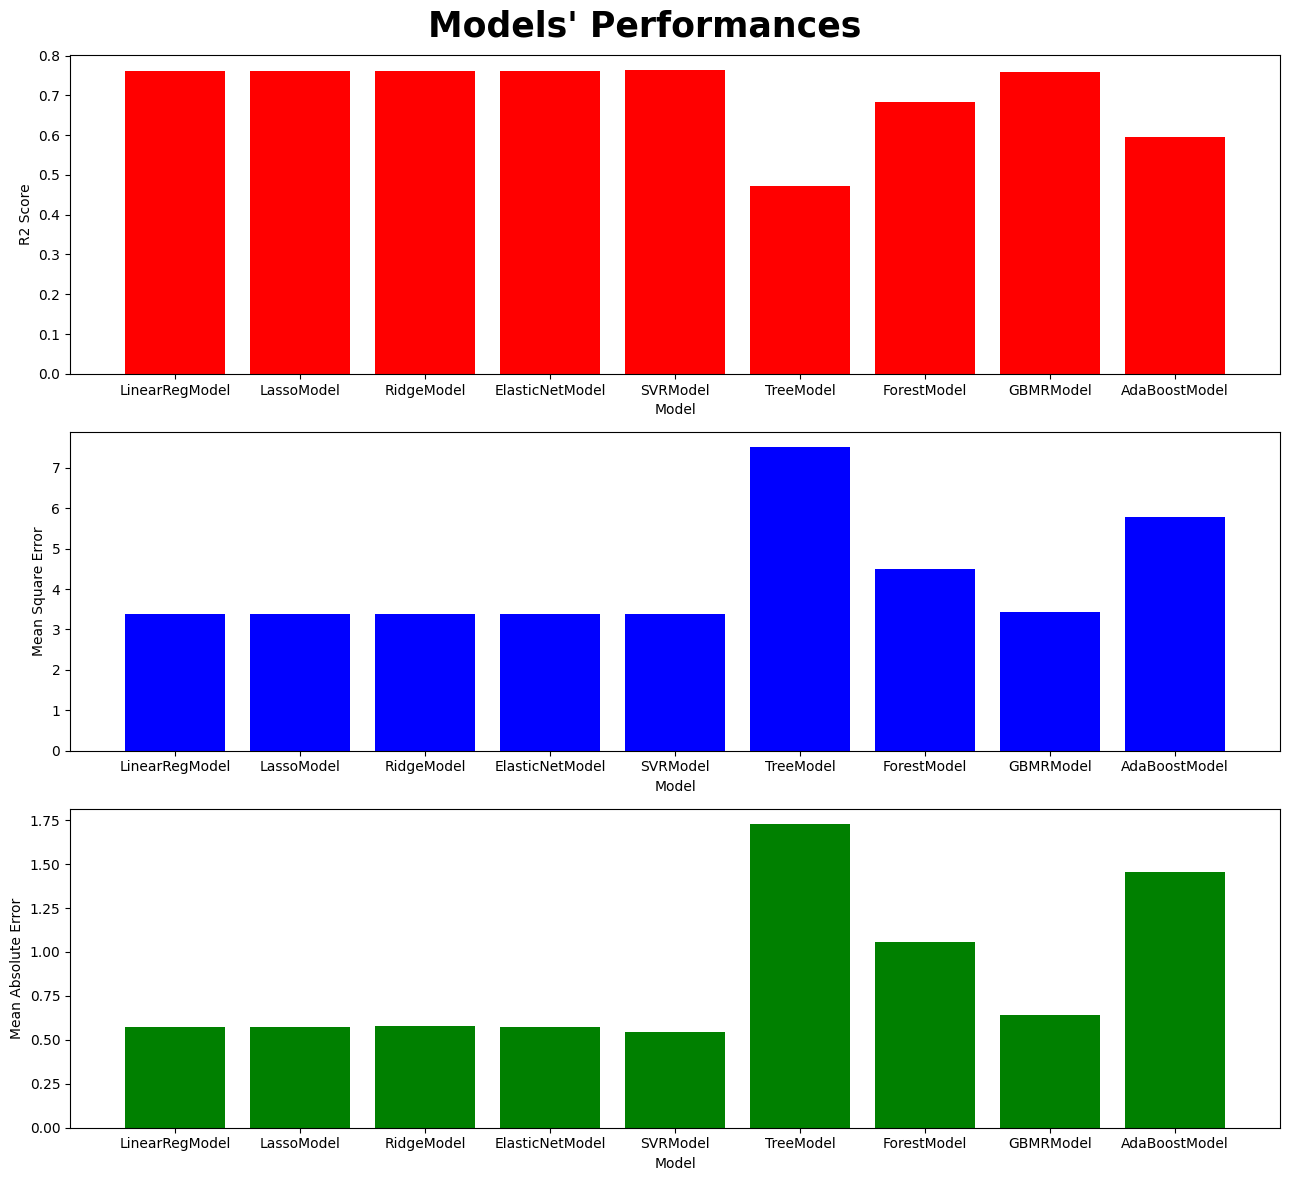

In [90]:
fig,axs = plt.subplots(3,1,figsize=(13,12))
fig.suptitle("Models' Performances",fontsize=25, fontweight='bold')
axs[0].bar(final_results_df.index,final_results_df['R2 Score'],color='Red')
axs[0].set_xlabel('Model')
axs[0].set_ylabel('R2 Score')
axs[1].bar(final_results_df.index,final_results_df['Mean Square Error'],color='Blue')
axs[1].set_xlabel('Model')
axs[1].set_ylabel('Mean Square Error')
axs[2].bar(final_results_df.index,final_results_df['Mean Absolute Error'],color='Green')
axs[2].set_xlabel('Model')
axs[2].set_ylabel('Mean Absolute Error')
fig.tight_layout()
plt.show()